# Plot M2 amplitude and phase for tidal runs and for FES2014

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.interpolate import LinearNDInterpolator, NearestNDInterpolator
import scipy.stats
from cartopy import crs as ccrs
import xarray as xr
import xesmf as xe

from matplotlib.ticker import MaxNLocator
from matplotlib.colors import BoundaryNorm


### Load data

In [2]:
#define filenames

relative_data_dir_path="../data/raw/"  # Note that this points to /gws/nopw/j04/class_vol2/senemo in this example

# first, the T-grid files for the tidal analysis of SSH

fname_tide_ssh=[relative_data_dir_path+'RUNS2024r01/GS1p1_tide/output/SENEMO_1y_19810101_19811231_grid_T_2D.nc'] 
fname_tide_ssh.append(relative_data_dir_path+'RUNS2024r01/GS1p2_full/output/SENEMO_1y_19810101_19811231_grid_T_2D.nc')
fname_tide_ssh.append(relative_data_dir_path+'cwilso01/EXPIWD02/output/SENEMO_1y_19780101_19781231_grid_T_2D.nc')
fname_tide_ssh.append(relative_data_dir_path+'jholt/EXP_GS1p6_full_IWD_soenhance_SSR_ice/SENEMO_1y_19810101_19811231_grid_T_2D.nc')
fname_tide_ssh.append(relative_data_dir_path+'jholt/EXP_GS1p6_full_IWD_soenhance_SSR_ice_so/SENEMO_1y_19810101_19811231_grid_T_2D.nc')
fname_tide_ssh.append(relative_data_dir_path+'jholt/EXP_GS1p6_full_IWD_soenhance10_SSR_ice_so/SENEMO_1y_19810101_19811231_grid_T_2D.nc')
fname_tide_ssh.append(relative_data_dir_path+'jholt/EXP_GS1p6_full_IWD_soenhance_qdr/SENEMO_1y_19810101_19811231_grid_T_2D.nc')
fname_tide_ssh.append(relative_data_dir_path+'jholt/EXP_GS1p6_full_IWD_soenhance_qdr2/SENEMO_1y_19810101_19811231_grid_T_2D.nc')

# then the same for the U- and V-grid files, for the tidal analysis of U_barotropic and V_barotropic

fname_tide_u=[relative_data_dir_path+'RUNS2024r01/GS1p1_tide/output/SENEMO_1y_19810101_19811231_grid_U_2D.nc']
fname_tide_u.append(relative_data_dir_path+'RUNS2024r01/GS1p2_full/output/SENEMO_1y_19810101_19811231_grid_U_2D.nc')
fname_tide_u.append(relative_data_dir_path+'cwilso01/EXPIWD02/output/SENEMO_1y_19780101_19781231_grid_U_2D.nc')
fname_tide_u.append(relative_data_dir_path+'jholt/EXP_GS1p6_full_IWD_soenhance_SSR_ice/SENEMO_1y_19810101_19811231_grid_U_2D.nc')
fname_tide_u.append(relative_data_dir_path+'jholt/EXP_GS1p6_full_IWD_soenhance_SSR_ice_so/SENEMO_1y_19810101_19811231_grid_U_2D.nc')
fname_tide_u.append(relative_data_dir_path+'jholt/EXP_GS1p6_full_IWD_soenhance10_SSR_ice_so/SENEMO_1y_19810101_19811231_grid_U_2D.nc')
fname_tide_u.append(relative_data_dir_path+'jholt/EXP_GS1p6_full_IWD_soenhance_qdr/SENEMO_1y_19810101_19811231_grid_U_2D.nc')
fname_tide_u.append(relative_data_dir_path+'jholt/EXP_GS1p6_full_IWD_soenhance_qdr2/SENEMO_1y_19810101_19811231_grid_U_2D.nc')

fname_tide_v=[relative_data_dir_path+'RUNS2024r01/GS1p1_tide/output/SENEMO_1y_19810101_19811231_grid_V_2D.nc']
fname_tide_v.append(relative_data_dir_path+'RUNS2024r01/GS1p2_full/output/SENEMO_1y_19810101_19811231_grid_V_2D.nc')
fname_tide_v.append(relative_data_dir_path+'cwilso01/EXPIWD02/output/SENEMO_1y_19780101_19781231_grid_V_2D.nc')
fname_tide_v.append(relative_data_dir_path+'jholt/EXP_GS1p6_full_IWD_soenhance_SSR_ice/SENEMO_1y_19810101_19811231_grid_V_2D.nc')
fname_tide_v.append(relative_data_dir_path+'jholt/EXP_GS1p6_full_IWD_soenhance_SSR_ice_so/SENEMO_1y_19810101_19811231_grid_V_2D.nc')
fname_tide_v.append(relative_data_dir_path+'jholt/EXP_GS1p6_full_IWD_soenhance10_SSR_ice_so/SENEMO_1y_19810101_19811231_grid_V_2D.nc')
fname_tide_v.append(relative_data_dir_path+'jholt/EXP_GS1p6_full_IWD_soenhance_qdr/SENEMO_1y_19810101_19811231_grid_V_2D.nc')
fname_tide_v.append(relative_data_dir_path+'jholt/EXP_GS1p6_full_IWD_soenhance_qdr2/SENEMO_1y_19810101_19811231_grid_V_2D.nc')

#open files
ds_ssh={}
ds_u={}
ds_v={}

names=['GS1p1_tide','GS1p2_full','EXPIWD02','GS1p6_full_IWD_soenhance_SSR_ice',
       'GS1p6_full_IWD_soenhance_SSR_ice_so','GS1p6_full_IWD_soenhance10_SSR_ice_so','GS1p6_full_IWD_soenhance_qdr','GS1p6_full_IWD_soenhance_qdr2']

for i,name in enumerate(names):
    ds_ssh[name]=xr.open_dataset(fname_tide_ssh[i])
    ds_u[name]=xr.open_dataset(fname_tide_u[i])
    ds_v[name]=xr.open_dataset(fname_tide_v[i])



In [3]:
ds_v.keys()

dict_keys(['GS1p1_tide', 'GS1p2_full', 'EXPIWD02', 'GS1p6_full_IWD_soenhance_SSR_ice', 'GS1p6_full_IWD_soenhance_SSR_ice_so', 'GS1p6_full_IWD_soenhance10_SSR_ice_so', 'GS1p6_full_IWD_soenhance_qdr', 'GS1p6_full_IWD_soenhance_qdr2'])

In [4]:
ds_v['GS1p6_full_IWD_soenhance_SSR_ice']

<xarray.Dataset>
Dimensions:         (y: 1207, x: 1442, nvertex: 4)
Coordinates:
    nav_lat         (y, x) float32 ...
    nav_lon         (y, x) float32 ...
Dimensions without coordinates: y, x, nvertex
Data variables: (12/23)
    bounds_nav_lon  (y, x, nvertex) float32 ...
    bounds_nav_lat  (y, x, nvertex) float32 ...
    area            (y, x) float32 ...
    M2x_v           (y, x) float32 ...
    M2y_v           (y, x) float32 ...
    S2x_v           (y, x) float32 ...
    ...              ...
    K2x_v           (y, x) float32 ...
    K2y_v           (y, x) float32 ...
    P1x_v           (y, x) float32 ...
    P1y_v           (y, x) float32 ...
    MS4x_v          (y, x) float32 ...
    MS4y_v          (y, x) float32 ...
Attributes:
    name:         SENEMO_1y_19810101_19811231_grid_V_2D
    description:  tidal harmonics
    title:        tidal harmonics
    Conventions:  CF-1.6
    timeStamp:    2024-May-11 05:46:54 GMT
    uuid:         4cbc2ccc-4613-4aed-93e0-c2fdd90acdbc

### Load the model grid for ZPS and MES 

In [5]:
# Load the model grid for ZPS and MES 
fn_domcfg_ZPS= relative_data_dir_path + "RUNS2024r01/GS1p1_tide/config/domain_cfg.nc"  #symbolic link, which points to correct file
fn_domcfg_MES= relative_data_dir_path + "RUNS2024r01/GS1p2_full/config/domain_cfg.nc"  #symbolic link, which points to correct file
domcfgZPS = xr.open_dataset(fn_domcfg_ZPS)  
domcfgMES = xr.open_dataset(fn_domcfg_MES)

### Load the FES2014 tidal data

In [6]:
relative_FES_data_dir_path="../data/external/FES2014/"  #currently, this points to /gws/nopw/j04/class_vol2/senemo/shared/FES2014/

fn_FES2014_M2 = relative_FES_data_dir_path + "M2_z.nc"
m2fes=xr.open_dataset(fn_FES2014_M2)

fn_FES2014_S2 = relative_FES_data_dir_path + "S2_z.nc"
s2fes=xr.open_dataset(fn_FES2014_S2)

fn_FES2014_K1= relative_FES_data_dir_path + "K1_z.nc"
k1fes=xr.open_dataset(fn_FES2014_K1)

fn_FES2014_K2 = relative_FES_data_dir_path + "K2_z.nc"
k2fes=xr.open_dataset(fn_FES2014_K2)

fn_FES2014_N2= relative_FES_data_dir_path + "N2_z.nc"
n2fes=xr.open_dataset(fn_FES2014_N2)

fn_FES2014_O1 = relative_FES_data_dir_path + "O1_z.nc"
o1fes=xr.open_dataset(fn_FES2014_O1)

fn_FES2014_P1 = relative_FES_data_dir_path + "P1_z.nc"
p1fes=xr.open_dataset(fn_FES2014_P1)

fn_FES2014_Q1  = relative_FES_data_dir_path + "Q1_z.nc"
q1fes=xr.open_dataset(fn_FES2014_Q1)

### Define depth for each grid

In [7]:
deptht_ZPS=domcfgZPS.bathy_metry[0,:,:]

deptht_MES=domcfgMES.bathy_meter[0,:,:]

### Define a function to convert the real and imaginary components of complex number to amplitude and phase

In [8]:
def amp_pha_from_re_im(creal,cimag):
    cc=creal+cimag*1j
    amp=np.abs(cc)
    pha=np.angle(cc)*180/np.pi
    return(amp,pha)
    

### Calculate M2 amplitude and phase for SSH

In [9]:
ssh_amp={}
ssh_pha={}
for name in names:
    ssh_amp[name],ssh_pha[name]= amp_pha_from_re_im(ds_ssh[name].M2x,ds_ssh[name].M2y)




### Interpolate FES2014 data to SENEMO grid

In [10]:
#remove the halo (1 point) from SENEMO grid
ds_out=ssh_amp[names[0]][1:-1,1:-1]  #use one of the model grids

ds_in=m2fes.amplitude[:,:]


In [11]:
ds_in.longitude.max()  #note that the max longitude of the FES grid is not quite 180 deg., unlike the eORCA025 grid.  This may explain the discontinuity at the dateline.

<xarray.DataArray 'longitude' ()>
array(179.91667, dtype=float32)

In [12]:
ds_in.longitude.min()

<xarray.DataArray 'longitude' ()>
array(-180., dtype=float32)

In [13]:
ds_out.nav_lon.max()

<xarray.DataArray 'nav_lon' ()>
array(180., dtype=float32)

In [14]:
ds_out.nav_lon.min()

<xarray.DataArray 'nav_lon' ()>
array(-180., dtype=float32)

In [15]:
## May need to uncomment and run the two lines below, the first time this cell is reached
ds_in = ds_in.rename({"longitude": "lon", "latitude": "lat"})
ds_out = ds_out.rename({"nav_lon": "lon", "nav_lat": "lat"})

## Calculate the 'regridder' (which can be applied repeatedly to arrays with grids as defined here).   Slow to calculate initially (a few mins), but then fast to apply the regridding weights subsequently.

In [16]:
## Can skip this and read the files back in (see below)
###regridder = xe.Regridder(ds_in, ds_out, 'bilinear',periodic=True)

## Apply the regridder:  regrid FES2014 M2 amplitude and phase to the SENEMO grid.  

In [17]:
#M2FESamp_on_SENEMO_GRID=regridder(m2fes.amplitude[1:-1,1:-1])
#M2FESpha_on_SENEMO_GRID=regridder(m2fes.phase[1:-1,1:-1])

###M2FESamp_on_SENEMO_GRID=regridder(m2fes.amplitude)
###M2FESpha_on_SENEMO_GRID=regridder(m2fes.phase)

In [18]:
###M2FESamp_on_SENEMO_GRID.isel(x=np.arange(400,600)).plot()

### Need to apply mask to regridded FES2014 data


In [19]:
# Create a land mask for the regridded FES data, with NaN over land
tl=domcfgZPS.top_level
tl=np.squeeze(tl)
tl=tl[1:-1,1:-1]
tl=tl.where(tl>0.5,drop=True)
tl
nanpatch=np.ones([151,1440])*np.nan
np.shape(nanpatch)
maskZPS=np.vstack((nanpatch,tl))


# Create a land mask for the MES grid, with NaN over land
tl=domcfgMES.top_level
tl=np.squeeze(tl)
tl=tl[1:-1,1:-1]
tl=tl.where(tl>0.5,drop=True)
tl
nanpatch=np.ones([151,1440])*np.nan
np.shape(nanpatch)
maskMES=np.vstack((nanpatch,tl))

In [20]:
###M2FESamp_on_SENEMO_GRID_masked=M2FESamp_on_SENEMO_GRID*maskZPS
###M2FESpha_on_SENEMO_GRID_masked=M2FESpha_on_SENEMO_GRID*maskZPS

### write regridded data to files

In [21]:
###ds=M2FESamp_on_SENEMO_GRID_masked.to_dataset(name='M2amp')
###ds.to_netcdf('../data/interim/FES2014_M2amp_on_SENEMO_GRID.nc')

###ds=M2FESpha_on_SENEMO_GRID_masked.to_dataset(name='M2pha')
###ds.to_netcdf('../data/interim/FES2014_M2pha_on_SENEMO_GRID.nc')

### ....or read them back in here

In [22]:
M2FESamp_on_SENEMO_GRID_masked = xr.open_dataset('../data/external/regridded/FES2014_M2amp_on_SENEMO_GRID.nc')
M2FESpha_on_SENEMO_GRID_masked = xr.open_dataset('../data/external/regridded/FES2014_M2pha_on_SENEMO_GRID.nc')


### calculate cell area appropriate for t-point variables (i.e. SSH, but not u, v) 

In [23]:
ZPScell_t_area=np.squeeze(domcfgZPS.e1t[0,1:-1,1:-1]*domcfgZPS.e2t[0,1:-1,1:-1])*maskZPS
MEScell_t_area=np.squeeze(domcfgMES.e1t[0,1:-1,1:-1]*domcfgMES.e2t[0,1:-1,1:-1])*maskMES

In [24]:
np.shape(maskMES)

(1205, 1440)

In [25]:
#sum the total area 
ZPS_cell_t_area_sum=ZPScell_t_area.sum(dim=None, keep_attrs=True)
MES_cell_t_area_sum=MEScell_t_area.sum(dim=None, keep_attrs=True)

In [26]:
ZPS_cell_t_area_sum  # As a check, this should equal approximately the global area of the ocean, approx. 3.61e14 m^2

<xarray.DataArray ()>
array(3.61659935e+14)
Coordinates:
    time_counter  float64 0.0

In [27]:
difference_as_fraction=(MES_cell_t_area_sum-ZPS_cell_t_area_sum)/ZPS_cell_t_area_sum

In [28]:
difference_as_fraction

<xarray.DataArray ()>
array(-0.00218884)
Coordinates:
    time_counter  float64 0.0

In [29]:
MES_cell_t_area_sum

<xarray.DataArray ()>
array(3.60868318e+14)

In [30]:
#Calculate error in M2 component of ssh w.r.t. FES2014, applying gridcell area weighting

err_ssh={}
err2_areawgt_ssh={}
rmse_areawgt_ssh={}
me_areawgt_ssh={}
for name in names:
    print(name)
    if not '4.2.2' in name:
        err_ssh[name]=(ssh_amp[name].values[1:-1,1:-1]-M2FESamp_on_SENEMO_GRID_masked.to_array().squeeze())
    else:
        err_ssh[name]=(ssh_amp[name].values[1:,:]-M2FESamp_on_SENEMO_GRID_masked.to_array().squeeze())
        
#square the "errors" and apply gridcell area weights
    err2_areawgt_ssh[name]=err_ssh[name]**2*ZPScell_t_area

#take the sqrt of the (sum of the squared, weighted errors, divided by the total area)
    rmse_areawgt_ssh[name]=np.sqrt(np.nansum(err2_areawgt_ssh[name])/ZPS_cell_t_area_sum)
    me_areawgt_ssh[name]=np.nansum(err_ssh[name]*ZPScell_t_area)/ZPS_cell_t_area_sum



GS1p1_tide
GS1p2_full
EXPIWD02
GS1p6_full_IWD_soenhance_SSR_ice
GS1p6_full_IWD_soenhance_SSR_ice_so
GS1p6_full_IWD_soenhance10_SSR_ice_so
GS1p6_full_IWD_soenhance_qdr
GS1p6_full_IWD_soenhance_qdr2


In [31]:
for name in names:
    print(name, rmse_areawgt_ssh[name].values,me_areawgt_ssh[name].values)

GS1p1_tide 0.12385320692583592 -0.012109283025262988
GS1p2_full 0.13061983022801824 -0.021762868269306394
EXPIWD02 0.12997977351675677 -0.019911921861191652
GS1p6_full_IWD_soenhance_SSR_ice 0.12786668761949457 -0.025037737860852966
GS1p6_full_IWD_soenhance_SSR_ice_so 0.174126516697646 -0.08979562643089106
GS1p6_full_IWD_soenhance10_SSR_ice_so 0.12147857623285299 -0.03369467617284265
GS1p6_full_IWD_soenhance_qdr 0.11414088022112907 -0.048586604394588666
GS1p6_full_IWD_soenhance_qdr2 0.11438180414116 -0.047599038814571615


In [32]:
M2FESamp_on_SENEMO_GRID_masked

<xarray.Dataset>
Dimensions:  (y: 1205, x: 1440)
Coordinates:
    lon      (y, x) float32 ...
    lat      (y, x) float32 ...
Dimensions without coordinates: y, x
Data variables:
    M2amp    (y, x) float64 nan nan nan nan nan nan ... nan nan nan nan nan nan

1.5788573 0.5359649062156677 1.0267448425292969 0.56767106


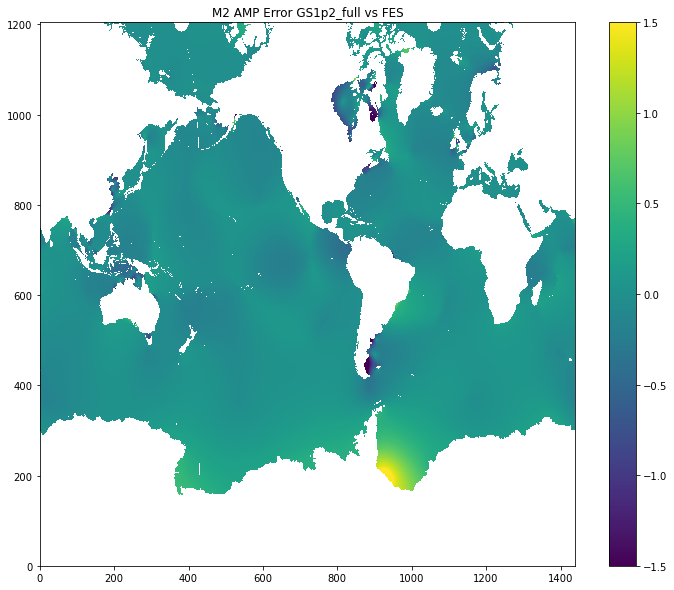

In [39]:
plt.figure(figsize=(12,10))
plt.pcolormesh(err_ssh['GS1p2_full'].values[:,:],vmin=-1.5,vmax=1.5);plt.colorbar(orientation='vertical')
plt.title('M2 AMP Error GS1p2_full vs FES')
print(ssh_amp['GS1p2_full'].values[200,980],
      M2FESamp_on_SENEMO_GRID_masked.M2amp.values[200-1,980-1],err_ssh['GS1p2_full'].values[200,980],
     ssh_amp['GS1p6_full_IWD_soenhance_qdr2'].values[200,980] )

Text(0.5, 1.0, 'M2 AMP Error GS1p6_full_IWD_soenhance_qdr2 vs FES')

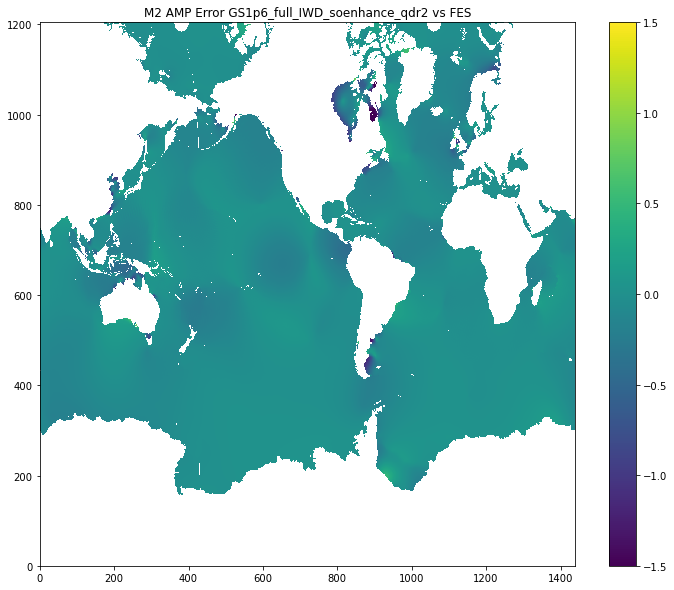

In [40]:
plt.figure(figsize=(12,10))
plt.pcolormesh(err_ssh['GS1p6_full_IWD_soenhance_qdr2'].values[:,:],vmin=-1.5,vmax=1.5);plt.colorbar(orientation='vertical')
plt.title('M2 AMP Error GS1p6_full_IWD_soenhance_qdr2 vs FES')

Text(0.5, 1.0, 'Difference in M2 amp IWD_soenhance_qdr2 - IWD_soenhance_SSR_ice')

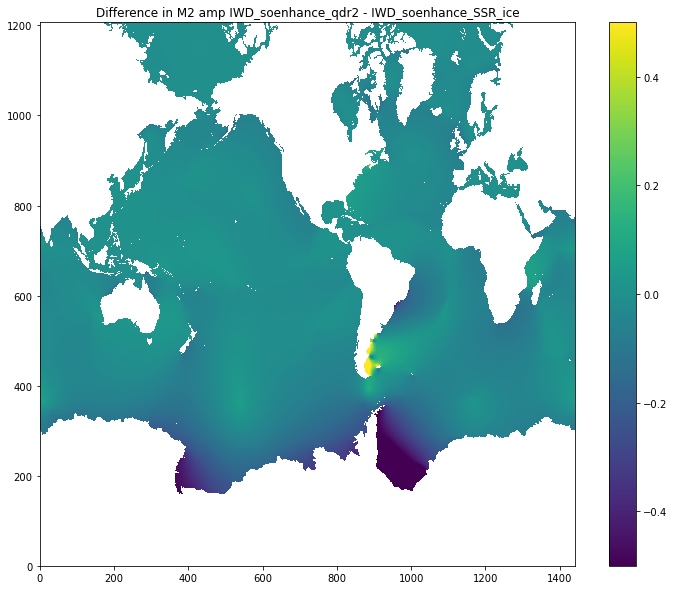

In [42]:
plt.figure(figsize=(12,10))
plt.pcolormesh(np.abs(ssh_amp['GS1p6_full_IWD_soenhance_qdr2'].values[:,:])-
               np.abs(ssh_amp['GS1p6_full_IWD_soenhance_SSR_ice'].values[:,:])
               ,vmin=-.5,vmax=.5);plt.colorbar(orientation='vertical')
plt.title('Difference in M2 amp IWD_soenhance_qdr2 - IWD_soenhance_SSR_ice')

Text(0.5, 1.0, 'Differences in ssh amp error IWD_soenhance_qdr2 - IWD_soenhance_SSR_ice')

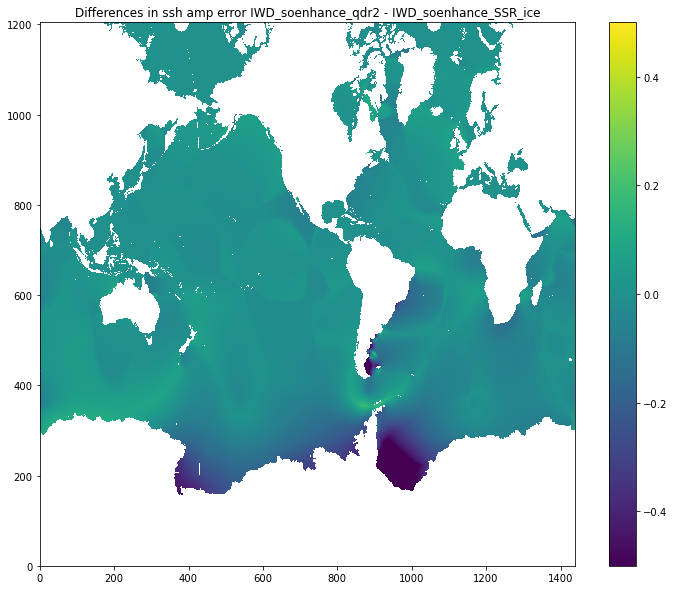

In [43]:
plt.figure(figsize=(12,10))
plt.pcolormesh(np.abs(err_ssh['GS1p6_full_IWD_soenhance_qdr2'].values[:,:])-
               np.abs(err_ssh['GS1p6_full_IWD_soenhance_SSR_ice'].values[:,:])
               ,vmin=-.5,vmax=.5);plt.colorbar(orientation='vertical')
plt.title('Differences in ssh amp error IWD_soenhance_qdr2 - IWD_soenhance_SSR_ice')

### Calculate the global integral of the KE, based on the M2 barotropic u and v

In [37]:
rho_0=1035.0 #as used in NEMO
#tidal harmonics are output in complex form and we want the
# amplitudes of each of the M2 u_baro and v_baro, so that they can be
# summed to form the KE for M2 vel_baro:   KE= 1/2 rho_o (|u_baro|**2+|vbaro|**2)

#Do these 1 run at a time, as quite easy to generate errors
print('GS1p1_tide')


#M2velsquared=(u_baro_amp**2+v_baro_amp**2)

#average the variables from u-, v-points onto the t-point

#coords are in (j,i) order

def interpolate_V_to_T(V):
    """
    Interpolate values from U-points to T-points in the east-west direction.
    
    Parameters:
    U (2D array): Variable located at U-points.
    
    Returns:
    T (2D array): Interpolated values at T-points.
    """
    T = 0.5 * (V[:-1, :] + V[1:, :])
    return T

def interpolate_U_to_T(U):
    """
    Interpolate values from V-points to T-points in the north-south direction.
    
    Parameters:
    V (2D array): Variable located at V-points.
    
    Returns:
    T (2D array): Interpolated values at T-points.
    """
    T = 0.5 * (U[:, :-1] + U[:, 1:])
    return T
M2vel={}    
for name in names:
    u_baro_amp,u_baro_pha=amp_pha_from_re_im(ds_u[name].M2x_u,ds_u[name].M2y_u)
    v_baro_amp,v_baro_pha=amp_pha_from_re_im(ds_v[name].M2x_v,ds_v[name].M2y_v)
    
    M2velsquared=(interpolate_U_to_T(u_baro_amp[1:-1,1:]))**2+(interpolate_V_to_T(v_baro_amp[1:,1:-1]))**2
    M2vel[name]=np.sqrt(M2velsquared)                         
    M2velsquared_dA=M2velsquared*ZPScell_t_area
    KE_per_gridcell=0.5*0.5*rho_0*M2velsquared_dA*deptht_ZPS[1:-1,1:-1]
    KE_global_integral=np.nansum(KE_per_gridcell)
    print (name)
    print('KE_global_integral',KE_global_integral)
    #print(M2vel[name].values[200,980])


GS1p1_tide
GS1p1_tide
KE_global_integral 1.7537403377916384e+17
GS1p2_full
KE_global_integral 1.6019214692178282e+17
EXPIWD02
KE_global_integral 1.620392114417145e+17
GS1p6_full_IWD_soenhance_SSR_ice
KE_global_integral 1.5690638110405373e+17
GS1p6_full_IWD_soenhance_SSR_ice_so
KE_global_integral 9.892990584205184e+16
GS1p6_full_IWD_soenhance10_SSR_ice_so
KE_global_integral 1.4864305441384806e+17
GS1p6_full_IWD_soenhance_qdr
KE_global_integral 1.359889224652611e+17
GS1p6_full_IWD_soenhance_qdr2
KE_global_integral 1.3675009184133835e+17


In [38]:
###

print('GS1p2_full')
u_baro_amp,u_baro_pha=amp_pha_from_re_im(ds_u_GS1p2_full.M2x_u,ds_u_GS1p2_full.M2y_u)
v_baro_amp,v_baro_pha=amp_pha_from_re_im(ds_v_GS1p2_full.M2x_v,ds_v_GS1p2_full.M2y_v)


M2velsquared=(interpolate_U_to_T(u_baro_amp[1:-1,1:]))**2+(interpolate_V_to_T(v_baro_amp[1:,1:-1]))**2
M2velsquared_dA=M2velsquared*MEScell_t_area
KE_per_gridcell=0.5*0.5*rho_0*M2velsquared_dA*deptht_MES[1:-1,1:-1]
KE_global_integral=np.nansum(KE_per_gridcell)

print('KE_global_integral',KE_global_integral)

###

print('EXPIWD02')
u_baro_amp,u_baro_pha=amp_pha_from_re_im(ds_u_EXPIWD02.M2x_u,ds_u_EXPIWD02.M2y_u)
v_baro_amp,v_baro_pha=amp_pha_from_re_im(ds_v_EXPIWD02.M2x_v,ds_v_EXPIWD02.M2y_v)

M2velsquared=(interpolate_U_to_T(u_baro_amp[1:-1,1:]))**2+(interpolate_V_to_T(v_baro_amp[1:,1:-1]))**2
M2velsquared_dA=M2velsquared*MEScell_t_area
KE_per_gridcell=0.5*0.5*rho_0*M2velsquared_dA*deptht_MES[1:-1,1:-1]
KE_global_integral=np.nansum(KE_per_gridcell)

print('KE_global_integral',KE_global_integral)

###

print('GS1p6_full_IWD_soenhance_SSR_ice')
u_baro_amp,u_baro_pha=amp_pha_from_re_im(ds_u_GS1p6_full_IWD_soenhance_SSR_ice.M2x_u,ds_u_GS1p6_full_IWD_soenhance_SSR_ice.M2y_u)
v_baro_amp,v_baro_pha=amp_pha_from_re_im(ds_v_GS1p6_full_IWD_soenhance_SSR_ice.M2x_v,ds_v_GS1p6_full_IWD_soenhance_SSR_ice.M2y_v)

M2velsquared=(interpolate_U_to_T(u_baro_amp[1:-1,1:]))**2+(interpolate_V_to_T(v_baro_amp[1:,1:-1]))**2
M2velsquared_dA=M2velsquared*MEScell_t_area
KE_per_gridcell=0.5*0.5*rho_0*M2velsquared_dA*deptht_MES[1:-1,1:-1]
KE_global_integral=np.nansum(KE_per_gridcell)

print('KE_global_integral',KE_global_integral)

###

print('GS1p6_full_IWD_soenhance_SSR_ice_so')
u_baro_amp,u_baro_pha=amp_pha_from_re_im(ds_u_GS1p6_full_IWD_soenhance_SSR_ice_so.M2x_u,ds_u_GS1p6_full_IWD_soenhance_SSR_ice_so.M2y_u)
v_baro_amp,v_baro_pha=amp_pha_from_re_im(ds_v_GS1p6_full_IWD_soenhance_SSR_ice_so.M2x_v,ds_v_GS1p6_full_IWD_soenhance_SSR_ice_so.M2y_v)

M2velsquared=(interpolate_U_to_T(u_baro_amp[1:-1,1:]))**2+(interpolate_V_to_T(v_baro_amp[1:,1:-1]))**2
M2velsquared_dA=M2velsquared*MEScell_t_area
KE_per_gridcell=0.5*0.5*rho_0*M2velsquared_dA*deptht_MES[1:-1,1:-1]
KE_global_integral=np.nansum(KE_per_gridcell)

print('KE_global_integral',KE_global_integral)

GS1p2_full


NameError: name 'ds_u_GS1p2_full' is not defined

In [ ]:
KE_per_gridcell.plot(vmin=0,vmax=2e12)

In [ ]:
M2vel[name].values[200,980]*0.0025*500

In [ ]:
0.0025*500

In [ ]:
deptht_MES[200,980]/(17*M2vel[name].values[200,980])

In [ ]:
M2vel.keys()

Text(0.5, 1.0, 'M2 tidal current GS1p6_full_IWD_soenhance_qdr2')

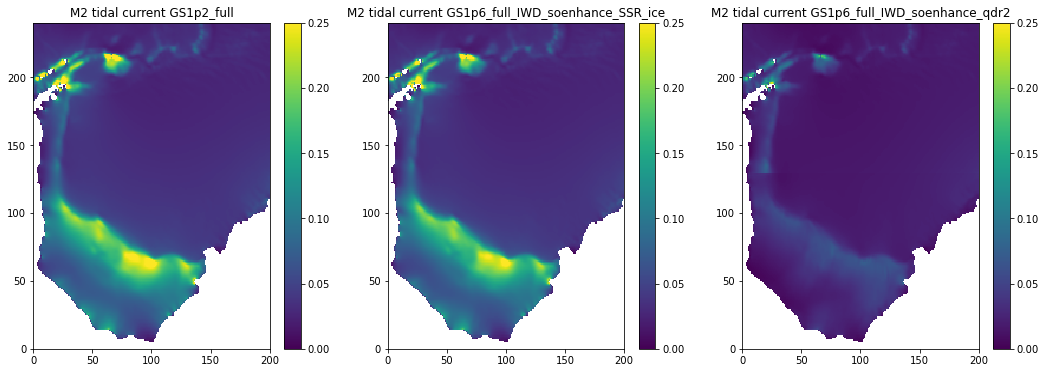

In [45]:
plt.figure(figsize=(18,6))
plt.subplot(1,3,1)
name='GS1p2_full'
plt.pcolormesh(M2vel[name][160:400,900:1100].values,vmin=0,vmax=.25);plt.colorbar(orientation='vertical')
plt.title(f'M2 tidal current {name}')
plt.subplot(1,3,2)
name='GS1p6_full_IWD_soenhance_SSR_ice'
plt.pcolormesh(M2vel[name][160:400,900:1100].values,vmin=0,vmax=.25);plt.colorbar(orientation='vertical')
plt.title(f'M2 tidal current {name}')
plt.subplot(1,3,3)
name='GS1p6_full_IWD_soenhance_qdr2'
plt.pcolormesh(M2vel[name][160:400,900:1100].values,vmin=0,vmax=.25);plt.colorbar(orientation='vertical')
plt.title(f'M2 tidal current {name}')

In [ ]:
A=(deptht_MES.values[161:401,1:-1]/(2*17*M2vel.values[160:400,:]))

In [ ]:
A[A==0]=np.nan

In [ ]:
np.nanmin(A)